## A Typical Tensorflow-Keras based ANN model

### Part 1 : Data Handling

In [1]:
#imports for handling and visualizing data 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We will use customer churn data which was taken from Kaggle for learning purpose.

In [2]:
dataset = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Complete-Deep-Learning/master/ANN/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
dataset.shape

(10000, 14)

The dataset has 13 features out of which "Exited" column is the dependent feature and the rest are independent features

Columns "RowNumber", "CustomerId" and "Surname" are not related to churn behaviour and thus we will exclude them from our independent features for training.

In [4]:
X = dataset.iloc[:, 3:-1]
y = dataset.iloc[:, -1]

In [5]:
print(X.shape)
print(y.shape)

(10000, 10)
(10000,)


In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


Geography and Gender are nominal categorical features here. We will use one hot encoding to encode them.

In [7]:
X = pd.get_dummies(X, columns=["Geography", "Gender"], drop_first=True)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


We will split the data in training and testing set with the help of train_test_split.

In [8]:
from sklearn.model_selection import train_test_split

We will use 30 percent of data as test data.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

We need to scale our data before training our model as it will improve convergence speed. We will use standard scaler.

In [10]:
#import
from sklearn.preprocessing import StandardScaler
#instansiate
sc = StandardScaler()

In [11]:
#fit_transform
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Part 2 : Building a Simple ANN model

We will use keras to build our ANN model. The code will follow syntax for tensorflow version greator than 2.0.

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

Like traditional machine learning models (logistic regression, KNN), deep learning models built with keras have a defined structure. The instantiate step for a deep learning model is longer than models like KNN. It includes defining the model and compiling the model.

In [13]:
#A simple ANN

#instantiate
#i.define model
model = Sequential()

#first hidden layer and visible layer
#note that we generally use "he_uniform" and "he_normal" as weight initialization for "relu" activation
#units specifies the number of neurons in the layer
#input_dim is the number of independent features we are providing the layer
#input_dim is only required for first layer
model.add(Dense(units=6, kernel_initializer="he_uniform",
                activation="relu", input_dim=11))
#second hidden layer
model.add(Dense(units=3, kernel_initializer="he_uniform",
                activation="relu"))
#output layer
model.add(Dense(units=1, kernel_initializer="glorot_uniform",
                     activation="sigmoid"))

#ii.compile the model
#we have to define the optimizer, loss function and evaluating metric while compiling the model
#since our output is 0 and 1 we will use "binary_cossentopy"
model.compile(optimizer="adam", loss="binary_crossentropy",
                   metrics=["accuracy"])

Using summary method, we can veiw a summary of our model.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________


After instantiating the model, we fit our data to the model.

We will use one third (33%) of our training data for validation purpose. 

In [15]:
#fit with batch_size=10 and epochs=100
model_history = model.fit(x=X_train, y=y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
469/469 [==============================] - 1s 1ms/step - loss: 0.7968 - accuracy: 0.5208 - val_loss: 0.6190 - val_accuracy: 0.7689
Epoch 2/100
469/469 [==============================] - 0s 944us/step - loss: 0.5785 - accuracy: 0.7938 - val_loss: 0.5527 - val_accuracy: 0.7962
Epoch 3/100
469/469 [==============================] - 0s 841us/step - loss: 0.5319 - accuracy: 0.7985 - val_loss: 0.5187 - val_accuracy: 0.7966
Epoch 4/100
469/469 [==============================] - 0s 915us/step - loss: 0.4987 - accuracy: 0.8053 - val_loss: 0.4894 - val_accuracy: 0.8096
Epoch 5/100
469/469 [==============================] - 0s 851us/step - loss: 0.4695 - accuracy: 0.8198 - val_loss: 0.4683 - val_accuracy: 0.8122
Epoch 6/100
469/469 [==============================] - 0s 850us/step - loss: 0.4494 - accuracy: 0.8238 - val_loss: 0.4535 - val_accuracy: 0.8152
Epoch 7/100
469/469 [==============================] - 0s 880us/step - loss: 0.4286 - accuracy: 0.8279 - val_loss: 0.4326 - val_accu

469/469 [==============================] - 0s 1ms/step - loss: 0.3355 - accuracy: 0.8622 - val_loss: 0.3676 - val_accuracy: 0.8533
Epoch 58/100
469/469 [==============================] - 0s 944us/step - loss: 0.3352 - accuracy: 0.8614 - val_loss: 0.3655 - val_accuracy: 0.8516
Epoch 59/100
469/469 [==============================] - 0s 951us/step - loss: 0.3352 - accuracy: 0.8620 - val_loss: 0.3660 - val_accuracy: 0.8533
Epoch 60/100
469/469 [==============================] - 0s 1ms/step - loss: 0.3351 - accuracy: 0.8616 - val_loss: 0.3655 - val_accuracy: 0.8503
Epoch 61/100
469/469 [==============================] - 0s 971us/step - loss: 0.3349 - accuracy: 0.8624 - val_loss: 0.3654 - val_accuracy: 0.8542
Epoch 62/100
469/469 [==============================] - 0s 974us/step - loss: 0.3346 - accuracy: 0.8618 - val_loss: 0.3652 - val_accuracy: 0.8555
Epoch 63/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3346 - accuracy: 0.8601 - val_loss: 0.3648 - val_accuracy: 0.85

Our model has performed well. Both training accuracy and validation accuracy are about 85%. Using right weights and model structure will helps to obtain good accuracy. 

We can use history attribute of out fitted model to print out accuracy and loss at different instants of training.

In [16]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


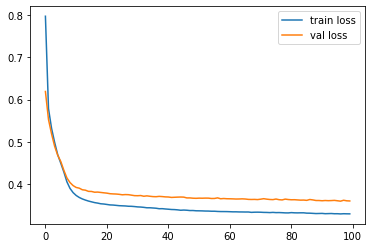

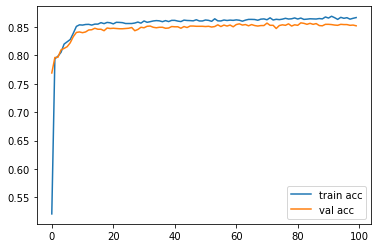

In [17]:
# plot the loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

We will now use the test data for final evaluation of our model.

In [18]:
y_pred = model.predict(X_test)
y_pred

array([[0.34300593],
       [0.25126386],
       [0.16947302],
       ...,
       [0.03351787],
       [0.09872043],
       [0.5077218 ]], dtype=float32)

In [22]:
y_pred_binary = y_pred > 0.5
y_pred_binary

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

We will use confusion matrix and accuracy score for model evaluation with test data.

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
confusion_matrix(y_test, y_pred_binary)

array([[2303,   76],
       [ 344,  277]], dtype=int64)

In [24]:
accuracy_score(y_test, y_pred_binary)

0.86

Our training accuracy and test accuracy are similar. So our model is not overfitting the training data. Maybe we can improve our model.

### Part 3 : Building an ANN model with keras-tuner

In [25]:
#you will need to uncomment the code below if keras-tuner is not installed
#!pip install keras-tuner

In [26]:
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam

So we will consider some of the parameters of our model build above as hyperparameters that we need to tune to obtain a better model.

- How many hidden layers we should have?
- How many neurons in each hidden layer?
- Learning rate to be used for optimizer
- Fraction of neurons to be dropped to avoid overfitting in each hidden layer

We can add more hyperparameters if needed.

In [27]:
#hp signifies hyperparameters we are going to tune
def build_model(hp):
    ann = Sequential()
    ann.add(Dense(units=hp.Int("units_"+str(0), min_value=4, max_value=80, step=4),
                  activation="relu",kernel_initializer="he_uniform", input_dim=11))
    ann.add(Dropout(rate=hp.Choice("droupout_"+str(0), [0.1, 0.2, 0.3])))
    
    #our neural network will have hidden layers between 2 to 20
    for i in range(hp.Int("num_layers", 1, 20)):
        #inside each Dense layer the number of neurons can be 4 to 80
        #hp.Int signifies the choice is from a range
        ann.add(Dense(units=hp.Int("units_"+str(i),
                                           min_value=4,
                                           max_value=80,
                                           step=4),
                        activation="relu", kernel_initializer="he_uniform"))
        ann.add(Dropout(rate=hp.Choice("droupout_"+str(i), [0.1, 0.2, 0.3])))
        
    #output layer
    ann.add(Dense(1, kernel_initializer="glorot_uniform", activation="sigmoid"))
    
    #hp.Choice signifies the choice is from a list
    ann.compile(optimizer=Adam(hp.Choice("learning_rate", [1e-2,1e-3,1e-4])),
                  loss="binary_crossentropy", metrics=["accuracy"])
    return ann

In [28]:
tuner = RandomSearch(build_model, objective='val_accuracy',
                    max_trials=20, directory="project1",
                    project_name="customer_churn")

The code below gives a summary of the range and choices we have set for parameters we want to tune. For example, for "num_layers" we want an integer value from 2 to 20. 

In [29]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 4, 'max_value': 80, 'step': 4, 'sampling': None}
droupout_0 (Choice)
{'default': 0.1, 'conditions': [], 'values': [0.1, 0.2, 0.3], 'ordered': True}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 20, 'step': 1, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [30]:
tuner.search(X_train, y_train, epochs=3, validation_split=0.3)

Trial 20 Complete [00h 00m 04s]
val_accuracy: 0.7995238304138184

Best val_accuracy So Far: 0.8428571224212646
Total elapsed time: 00h 00m 58s
INFO:tensorflow:Oracle triggered exit


In [31]:
tuner.results_summary()

Results summary
Results in project1\customer_churn
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
units_0: 40
droupout_0: 0.3
num_layers: 3
learning_rate: 0.01
units_1: 56
droupout_1: 0.1
units_2: 80
droupout_2: 0.3
units_3: 60
droupout_3: 0.1
units_4: 48
droupout_4: 0.3
units_5: 8
droupout_5: 0.3
units_6: 44
droupout_6: 0.2
units_7: 80
droupout_7: 0.1
units_8: 32
droupout_8: 0.1
units_9: 28
droupout_9: 0.1
units_10: 64
droupout_10: 0.3
units_11: 80
droupout_11: 0.2
units_12: 80
droupout_12: 0.2
units_13: 48
droupout_13: 0.1
units_14: 12
droupout_14: 0.1
units_15: 56
droupout_15: 0.3
units_16: 68
droupout_16: 0.3
units_17: 12
droupout_17: 0.3
units_18: 8
droupout_18: 0.2
units_19: 48
droupout_19: 0.1
Score: 0.8428571224212646
Trial summary
Hyperparameters:
units_0: 16
droupout_0: 0.1
num_layers: 2
learning_rate: 0.001
units_1: 52
droupout_1: 0.1
units_2: 16
droupout_2: 0.1
units_3: 44
droupout_3: 0.3
units_4: 68
droupout_4: 0.3
uni

In [32]:
model_kt = tuner.get_best_models(num_models=1)[0]

In [33]:
model_kt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                480       
_________________________________________________________________
dropout (Dropout)            (None, 40)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 40)                1640      
_________________________________________________________________
dropout_1 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 56)                2296      
_________________________________________________________________
dropout_2 (Dropout)          (None, 56)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 80)                4

In [34]:
#fit with batch_size=10 and epochs=100
model_history_kt = model_kt.fit(x=X_train, y=y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.4366 - accuracy: 0.8224 - val_loss: 0.4309 - val_accuracy: 0.7971
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4301 - accuracy: 0.8258 - val_loss: 0.3955 - val_accuracy: 0.8239
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4017 - accuracy: 0.8322 - val_loss: 0.3918 - val_accuracy: 0.8403
Epoch 4/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4053 - accuracy: 0.8296 - val_loss: 0.3861 - val_accuracy: 0.8503
Epoch 5/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4058 - accuracy: 0.8330 - val_loss: 0.4062 - val_accuracy: 0.8325
Epoch 6/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4068 - accuracy: 0.8396 - val_loss: 0.3768 - val_accuracy: 0.8412
Epoch 7/100
469/469 [==============================] - 1s 1ms/step - loss: 0.4098 - accuracy: 0.8302 - val_loss: 0.3911 - val_accuracy: 0.8196

Epoch 58/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3879 - accuracy: 0.8401 - val_loss: 0.3796 - val_accuracy: 0.8395
Epoch 59/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3900 - accuracy: 0.8383 - val_loss: 0.3718 - val_accuracy: 0.8464
Epoch 60/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3836 - accuracy: 0.8464 - val_loss: 0.3883 - val_accuracy: 0.8265
Epoch 61/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3857 - accuracy: 0.8339 - val_loss: 0.3757 - val_accuracy: 0.8429
Epoch 62/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3985 - accuracy: 0.8413 - val_loss: 0.3892 - val_accuracy: 0.8209
Epoch 63/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3975 - accuracy: 0.8351 - val_loss: 0.3736 - val_accuracy: 0.8369
Epoch 64/100
469/469 [==============================] - 1s 1ms/step - loss: 0.3895 - accuracy: 0.8386 - val_loss: 0.3745 - val_accuracy:

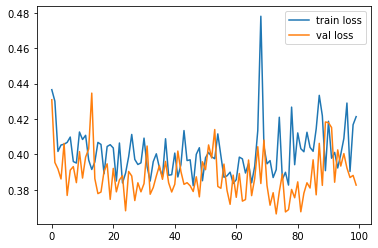

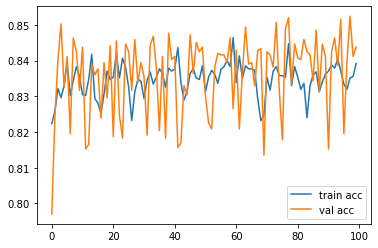

In [35]:
# plot the loss
plt.plot(model_history_kt.history['loss'], label='train loss')
plt.plot(model_history_kt.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(model_history_kt.history['accuracy'], label='train acc')
plt.plot(model_history_kt.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [33]:
y_pred = model_kt.predict(X_test)
y_pred_binary = y_pred > 0.5
y_pred_binary

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [34]:
confusion_matrix(y_test, y_pred_binary)

array([[2368,   11],
       [ 494,  127]], dtype=int64)

In [35]:
accuracy_score(y_test, y_pred_binary)

0.8316666666666667

Our accuracy changed slightly. However, we know our model structure is not at fault. We simply need more data for better accuracy. Keras-tuner can be extremely helpful for defining a good model for the given task. Running the tuner for more number of trials may provide sightly better results as well.